# Features Texte : Réduction de dimension & Clustering
Ce notebook à pour objectif de réduire le nombre de features.
## Sommaire :
- [A - ACP](#A)
    - [A.1 - Preprocessing](#A.1)
    - [A.2 - ACP sur Lemmatized](#A.2)
    - [A.3 - ACP sur Stemmed](#A.3)
- [B - Visualisations t-SNE](#B)
- [C - Clustering K-Means](#C)
    - [C.1 - Lemmatized](#C.1)
    - [C.2 - Stemmed](#C.2)
- [D - Latent Dirichlet Allocation](#D)
- [E - Interprétation LDA](#E)
- [F - Enregistrement Bag of Words réduits](#F)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition
from sklearn import preprocessing 
from sklearn.manifold import TSNE

## Chargement du fichier 

In [2]:
txt_features_lem = pd.read_csv("Data/tfidf_values_lem.csv")
txt_features_lem

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
0,0.234519,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
1,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.582051,...,0.0,0.000000,0.0,0.000000,0.071375,0.076126,0.00000,0.198503,0.077785,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.131792,...,0.0,0.050665,0.0,0.000000,0.048483,0.051711,0.06103,0.000000,0.000000,0.0
3,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.182772,0.000000,0.00000,0.000000,0.066396,0.0
4,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.045646,0.0,0.162257,0.131043,0.000000,0.00000,0.000000,0.047604,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
1046,0.000000,0.0,0.0,0.120581,0.0,0.152189,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.108564,0.000000,0.00000,0.000000,0.000000,0.0
1047,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
1048,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0


In [3]:
txt_features_stem = pd.read_csv("Data/tfidf_values_stem.csv")
txt_features_stem

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
0,0.220232,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.071460,0.076485,0.0,0.000000,0.198741,0.077879,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.047946,0.051317,0.0,0.060353,0.000000,0.000000,0.0
3,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.176701,0.000000,0.0,0.000000,0.000000,0.064191,0.0
4,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.158885,0.0,0.128320,0.000000,0.0,0.000000,0.000000,0.046615,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0.000000,0.0,0.0,0.000000,0.0,0.438626,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1046,0.000000,0.0,0.0,0.101176,0.0,0.515051,0.127697,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.091093,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1047,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1048,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0


## A - ACP <a name=A ></a>
### A.1 - Preprocessing <a name=A.1 ></a>

In [4]:
# On centre et réduit les valeurs numériques
std_scale = preprocessing.StandardScaler().fit(txt_features_lem)
X_lem_scaled = std_scale.transform(txt_features_lem)

In [5]:
# On centre et réduit les valeurs numériques
std_scale = preprocessing.StandardScaler().fit(txt_features_stem)
X_stem_scaled = std_scale.transform(txt_features_stem)

In [6]:
pd.DataFrame(X_lem_scaled)

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
0,3.044149,-0.167141,-0.275346,-0.235432,-0.364408,-0.128003,-0.134978,-0.29793,-0.17863,-0.144243,...,-0.167805,-0.256250,-0.149204,-0.180069,-0.293232,-0.261926,-0.192124,-0.138453,-0.224158,-0.156954
1,-0.189128,-0.167141,-0.275346,-0.235432,-0.364408,-0.128003,-0.134978,-0.29793,-0.17863,8.484014,...,-0.167805,-0.256250,-0.149204,-0.180069,1.741238,0.559480,-0.192124,3.280162,1.362906,-0.156954
2,-0.189128,-0.167141,-0.275346,-0.235432,-0.364408,-0.128003,-0.134978,-0.29793,-0.17863,1.809429,...,-0.167805,1.226545,-0.149204,-0.180069,1.088746,0.296040,1.666999,-0.138453,-0.224158,-0.156954
3,-0.189128,-0.167141,-0.275346,-0.235432,-0.364408,-0.128003,-0.134978,-0.29793,-0.17863,-0.144243,...,-0.167805,-0.256250,-0.149204,-0.180069,4.916526,-0.261926,-0.192124,-0.138453,1.130530,-0.156954
4,-0.189128,-0.167141,-0.275346,-0.235432,-0.364408,-0.128003,-0.134978,-0.29793,-0.17863,-0.144243,...,-0.167805,1.079667,-0.149204,2.345312,3.442027,-0.261926,-0.192124,-0.138453,0.747118,-0.156954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,-0.189128,-0.167141,-0.275346,-0.235432,-0.364408,-0.128003,-0.134978,-0.29793,-0.17863,-0.144243,...,-0.167805,-0.256250,-0.149204,-0.180069,-0.293232,-0.261926,-0.192124,-0.138453,-0.224158,-0.156954
1046,-0.189128,-0.167141,-0.275346,2.813216,-0.364408,2.346821,-0.134978,-0.29793,-0.17863,-0.144243,...,-0.167805,-0.256250,-0.149204,-0.180069,2.801291,-0.261926,-0.192124,-0.138453,-0.224158,-0.156954
1047,-0.189128,-0.167141,-0.275346,-0.235432,-0.364408,-0.128003,-0.134978,-0.29793,-0.17863,-0.144243,...,-0.167805,-0.256250,-0.149204,-0.180069,-0.293232,-0.261926,-0.192124,-0.138453,-0.224158,-0.156954
1048,-0.189128,-0.167141,-0.275346,-0.235432,-0.364408,-0.128003,-0.134978,-0.29793,-0.17863,-0.144243,...,-0.167805,-0.256250,-0.149204,-0.180069,-0.293232,-0.261926,-0.192124,-0.138453,-0.224158,-0.156954


In [7]:
pd.DataFrame(X_stem_scaled)

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
0,2.836576,-0.168125,-0.288384,-0.232432,-0.364506,-0.116813,-0.128959,-0.133288,-0.132109,-0.298337,...,-0.148756,-0.179150,-0.138418,-0.292114,-0.259282,-0.139516,-0.191722,-0.137379,-0.222608,-0.157046
1,-0.188851,-0.168125,-0.288384,-0.232432,-0.364506,-0.116813,-0.128959,-0.133288,-0.132109,-0.298337,...,-0.148756,-0.179150,-0.138418,1.775776,0.567488,-0.139516,-0.191722,3.317066,1.384438,-0.157046
2,-0.188851,-0.168125,-0.288384,-0.232432,-0.364506,-0.116813,-0.128959,-0.133288,-0.132109,-0.298337,...,-0.148756,-0.179150,-0.138418,1.095331,0.295438,-0.139516,1.622865,-0.137379,-0.222608,-0.157046
3,-0.188851,-0.168125,-0.288384,-0.232432,-0.364506,-0.116813,-0.128959,-0.133288,-0.132109,-0.298337,...,-0.148756,-0.179150,-0.138418,4.821195,-0.259282,-0.139516,-0.191722,-0.137379,1.101983,-0.157046
4,-0.188851,-0.168125,-0.288384,-0.232432,-0.364506,-0.116813,-0.128959,-0.133288,-0.132109,-0.298337,...,-0.148756,2.311826,-0.138418,3.421167,-0.259282,-0.139516,-0.191722,-0.137379,0.739309,-0.157046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,-0.188851,-0.168125,-0.288384,-0.232432,-0.364506,13.154840,-0.128959,-0.133288,-0.132109,-0.298337,...,-0.148756,-0.179150,-0.138418,-0.292114,-0.259282,-0.139516,-0.191722,-0.137379,-0.222608,-0.157046
1046,-0.188851,-0.168125,-0.288384,2.417707,-0.364506,15.467247,2.065259,-0.133288,-0.132109,-0.298337,...,-0.148756,-0.179150,-0.138418,2.343901,-0.259282,-0.139516,-0.191722,-0.137379,-0.222608,-0.157046
1047,-0.188851,-0.168125,-0.288384,-0.232432,-0.364506,-0.116813,-0.128959,-0.133288,-0.132109,-0.298337,...,-0.148756,-0.179150,-0.138418,-0.292114,-0.259282,-0.139516,-0.191722,-0.137379,-0.222608,-0.157046
1048,-0.188851,-0.168125,-0.288384,-0.232432,-0.364506,-0.116813,-0.128959,-0.133288,-0.132109,-0.298337,...,-0.148756,-0.179150,-0.138418,-0.292114,-0.259282,-0.139516,-0.191722,-0.137379,-0.222608,-0.157046


In [8]:
#on charge les noms des catégories des produits
categ = pd.read_csv("Data/data_txt.csv")
categ = categ['clean_category']
categ

0       HomeFurnishing
1             BabyCare
2             BabyCare
3       HomeFurnishing
4       HomeFurnishing
             ...      
1045          BabyCare
1046          BabyCare
1047          BabyCare
1048          BabyCare
1049          BabyCare
Name: clean_category, Length: 1050, dtype: object

### A.2 - ACP sur Lemmatized <a name=A.2 ></a>

In [9]:
# Calcul des composantes principales
pca = decomposition.PCA()
pca.fit(X_lem_scaled)

PCA()

In [10]:
#nombre de composantes calculées
n_comp=pca.n_components_
n_comp

253

In [11]:
#variance expliquée / eigen values
eigval=pca.explained_variance_
pd.DataFrame(eigval)

,0
0,2.031189e+01
1,1.651566e+01
2,8.453453e+00
3,8.191875e+00
4,6.874560e+00
...,...
248,4.005814e-30
249,9.274255e-32
250,8.437212e-32
251,8.437212e-32


In [12]:
pd.DataFrame(eigval)[pd.DataFrame(eigval)[0]>1]

,0
0,20.311890
1,16.515660
2,8.453453
3,8.191875
4,6.874560
...,...
68,1.060428
69,1.056741
70,1.036662
71,1.026222


In [13]:
pd.DataFrame(eigval).mean()

0    1.000953
dtype: float64

In [14]:
#calcul de la somme des eigen values (doit être égale à ncomp) 
sum(eigval)

253.24118207816952

In [15]:
#proportion de variance expliquée
prop_eigval=pca.explained_variance_ratio_
prop_eigval
pd.DataFrame(prop_eigval.cumsum())

,0
0,0.080208
1,0.145425
2,0.178806
3,0.211154
4,0.238300
...,...
248,1.000000
249,1.000000
250,1.000000
251,1.000000


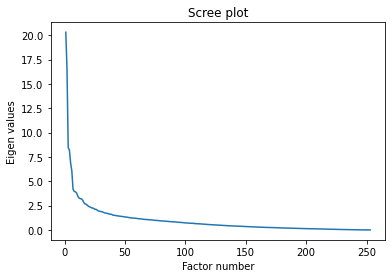

In [16]:
#scree plot
plt.plot(np.arange(1,n_comp+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

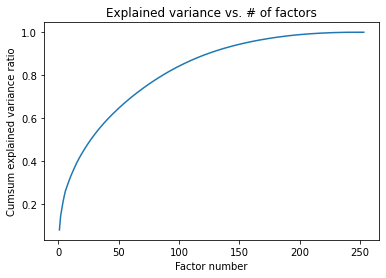

In [17]:
#cumul de variance expliquée
plt.plot(np.arange(1,n_comp+1),np.cumsum(prop_eigval))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [18]:
# Calcul des composantes principales
pca = decomposition.PCA(len(pd.DataFrame(eigval)[pd.DataFrame(eigval)[0]>1]))
x_lem_reduit=pd.DataFrame(pca.fit_transform(X_lem_scaled))
x_lem_reduit

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,3.913046,-2.456696,-2.474950,-0.212832,0.570064,-3.833258,-0.902989,-4.026453,-0.633434,-0.930260,...,1.985816,0.000055,-0.646206,-1.969374,0.763310,-0.671386,0.827813,0.781242,1.145564,0.524149
1,4.048864,-3.043255,0.259510,-1.318654,-2.116602,-2.280708,-1.336881,-1.750270,1.250799,-0.586330,...,-0.499791,0.056460,-1.692044,0.467694,-0.792398,-0.683903,-0.059027,-0.760287,-0.712216,-0.605785
2,4.763428,-2.586639,-1.573157,-0.507533,-0.900169,1.044283,-2.735629,-0.684535,1.584612,4.465372,...,-0.901554,-0.428885,0.412335,-0.329036,0.733650,1.608033,-0.023611,-2.814296,0.100399,-0.590021
3,5.321930,-4.229243,-0.082532,-2.489553,-3.204805,-3.803415,-1.822088,-4.358461,-2.838748,1.817766,...,-0.997111,0.247126,0.792107,0.669928,0.107563,-0.999376,-0.533619,1.712146,0.862950,-0.031661
4,4.946264,-3.142388,-2.078266,-1.252483,-2.270336,-1.813985,-2.306194,-4.094045,-3.246737,-0.097765,...,-0.817143,0.287208,1.743204,1.645475,-0.307739,-2.128681,-1.299215,1.360560,0.081871,0.319145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,1.595993,-0.772350,-2.948816,1.554730,2.140523,1.000634,-4.210744,2.677049,-0.782640,1.624400,...,-0.462359,2.575084,-2.307394,-2.405862,0.973278,-1.235023,0.921956,-0.926013,-0.112207,1.363823
1046,3.135646,0.568339,-4.190651,1.356140,3.166568,-1.332507,-5.082025,2.265987,-2.383425,0.499438,...,1.706491,-0.176040,-1.373776,1.773173,-0.738280,0.275361,-2.712849,-0.625232,-0.551682,0.375905
1047,-3.480592,0.905783,-0.656663,-1.436051,0.177833,-0.183084,0.078167,2.320766,-1.722392,-0.266121,...,-0.190554,-0.196588,0.361131,0.191637,0.496605,0.313287,0.331069,0.172846,-0.002842,-0.531330
1048,-1.795251,0.311085,-0.780774,-0.528926,0.630065,-0.194538,-1.390760,2.618257,-1.555879,-1.171897,...,-0.303500,-0.962306,1.187764,0.921730,1.119128,0.722343,0.182300,0.544307,0.266924,-1.433785


### A.3 - ACP sur Stemmed <a name=A.3 ></a>

In [19]:
# Calcul des composantes principales
pca = decomposition.PCA()
pca.fit(X_stem_scaled)

PCA()

In [20]:
#nombre de composantes calculées
n_comp=pca.n_components_
n_comp

258

In [21]:
#variance expliquée / eigen values
eigval=pca.explained_variance_
pd.DataFrame(eigval)

,0
0,2.023588e+01
1,1.488512e+01
2,8.693201e+00
3,8.217158e+00
4,7.334074e+00
...,...
253,2.910759e-03
254,2.699034e-04
255,6.751034e-05
256,3.990824e-30


In [22]:
pd.DataFrame(eigval)[pd.DataFrame(eigval)[0]>1]

,0
0,20.235882
1,14.885119
2,8.693201
3,8.217158
4,7.334074
...,...
72,1.025090
73,1.020041
74,1.015306
75,1.009287


In [23]:
pd.DataFrame(eigval).mean()

0    1.000953
dtype: float64

In [24]:
#calcul de la somme des eigen values (doit être égale à ncomp) 
sum(eigval)

258.2459485224024

In [25]:
#proportion de variance expliquée
prop_eigval=pca.explained_variance_ratio_
prop_eigval
pd.DataFrame(prop_eigval.cumsum())

,0
0,0.078359
1,0.135998
2,0.169661
3,0.201480
4,0.229879
...,...
253,0.999999
254,1.000000
255,1.000000
256,1.000000


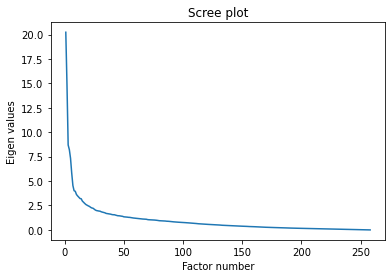

In [26]:
#scree plot
plt.plot(np.arange(1,n_comp+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

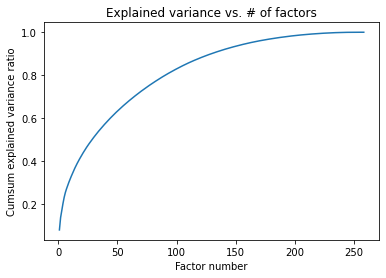

In [27]:
#cumul de variance expliquée
plt.plot(np.arange(1,n_comp+1),np.cumsum(prop_eigval))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [28]:
# Calcul des composantes principales
pca = decomposition.PCA(len(pd.DataFrame(eigval)[pd.DataFrame(eigval)[0]>1]))
x_stem_reduit=pd.DataFrame(pca.fit_transform(X_stem_scaled))
x_stem_reduit

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,4.194144,-1.381406,2.406280,-0.862469,0.240426,-4.401438,-1.471684,-2.526063,1.775598,-0.576625,...,-1.384215,0.238644,0.736544,2.171230,1.025378,-0.525643,0.469642,1.742699,-0.614677,1.337278
1,4.205327,-2.604589,-1.180881,-1.230243,-1.485092,-2.241909,-0.082004,-0.454908,2.521255,-1.038654,...,0.569709,-0.424701,0.430057,-0.860649,-0.454367,0.864438,-0.746607,-0.037873,-0.540084,-0.823584
2,5.108226,-1.475618,0.723109,-1.070230,-0.801295,0.803056,-1.847212,-1.831668,1.669763,2.158434,...,-0.507184,0.214252,0.151687,-2.414640,-0.101743,0.357808,0.741236,-0.329125,-0.262552,-0.881459
3,5.917847,-3.373232,-1.315742,-2.514518,-1.970181,-3.283619,0.294667,-4.921911,0.276568,-3.612171,...,1.044138,1.225007,0.594863,-0.423964,-0.562610,-1.650396,0.061431,-0.113744,-0.969054,2.058979
4,5.427565,-2.328026,0.279609,-2.155302,-2.025443,-1.698832,-0.735265,-4.765708,0.412092,-3.611053,...,1.518807,1.825315,-1.322314,0.125716,0.236366,-2.776313,-0.519215,-1.289241,-0.485495,2.816728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,2.467261,-0.287529,4.585457,0.524897,-1.643944,4.537404,-5.190626,3.060007,-0.034545,-4.613300,...,-1.786714,3.537851,2.509289,0.345801,0.238679,0.889765,-1.310121,-0.614435,2.255897,0.543915
1046,3.139508,1.408801,4.438027,0.289603,0.340008,-0.022263,-5.342389,2.747189,0.256152,-6.209500,...,-0.745067,2.233783,-2.065466,-1.460521,-1.552889,0.582859,-1.076639,-1.551090,2.689273,-0.057419
1047,-3.630415,0.436721,0.125416,-1.555990,0.249485,-0.143634,-0.508508,1.403571,-2.359341,-1.220592,...,-0.097328,-0.207549,0.088468,0.005734,0.168074,-0.112770,0.293294,-0.000247,-0.208438,-0.368503
1048,-1.861000,0.099446,0.579373,-0.771976,0.211647,-0.019797,-1.751880,1.945329,-1.713719,-2.628710,...,-0.362310,-0.741302,-0.525929,-0.077984,0.545051,-0.498198,0.693602,-0.321267,-0.597268,-1.006878


## B - Visualisations t-SNE <a name=B ></a>

In [29]:
color = ['purple','deepskyblue','red','chocolate','darkorange','forestgreen','royalblue']

In [30]:
tsne = TSNE() #perplexity=40
tsne_results_lem = tsne.fit_transform(x_lem_reduit)
tsne_results_lem = pd.DataFrame(tsne_results_lem)
tsne_results_lem

,0,1
0,8.451096,23.209099
1,7.066618,16.643642
2,7.061869,15.241760
3,-6.114233,26.143761
4,-6.467739,25.944002
...,...,...
1045,-5.875202,-16.009691
1046,-6.897367,-16.929066
1047,6.784946,-19.264402
1048,6.738455,-21.046131


In [31]:
tsne = TSNE() #perplexity=40
tsne_results_stem = tsne.fit_transform(x_stem_reduit)
tsne_results_stem = pd.DataFrame(tsne_results_stem)
tsne_results_stem

,0,1
0,-6.492498,21.869045
1,-3.874663,15.543406
2,-1.722423,15.283997
3,-20.372316,17.659842
4,-20.217884,17.607294
...,...,...
1045,8.618338,0.044822
1046,8.411016,0.099532
1047,10.595089,-18.469845
1048,12.438290,-18.977001


<AxesSubplot:xlabel='0', ylabel='1'>

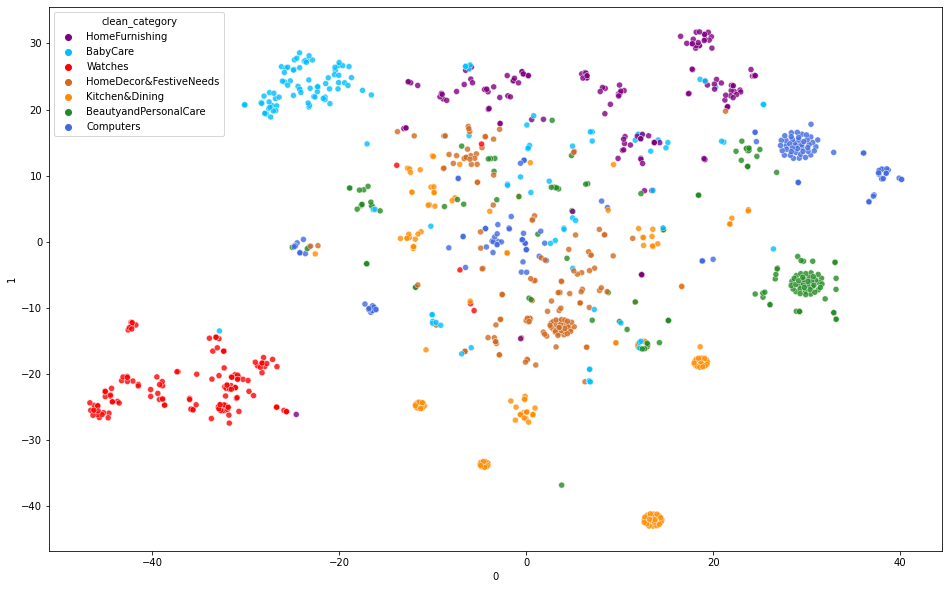

In [32]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results_lem[0], y=tsne_results_lem[1],
    hue=categ,
    palette=color,
    #data=df_subset,
    legend="full",
    alpha=0.8
)

<AxesSubplot:xlabel='0', ylabel='1'>

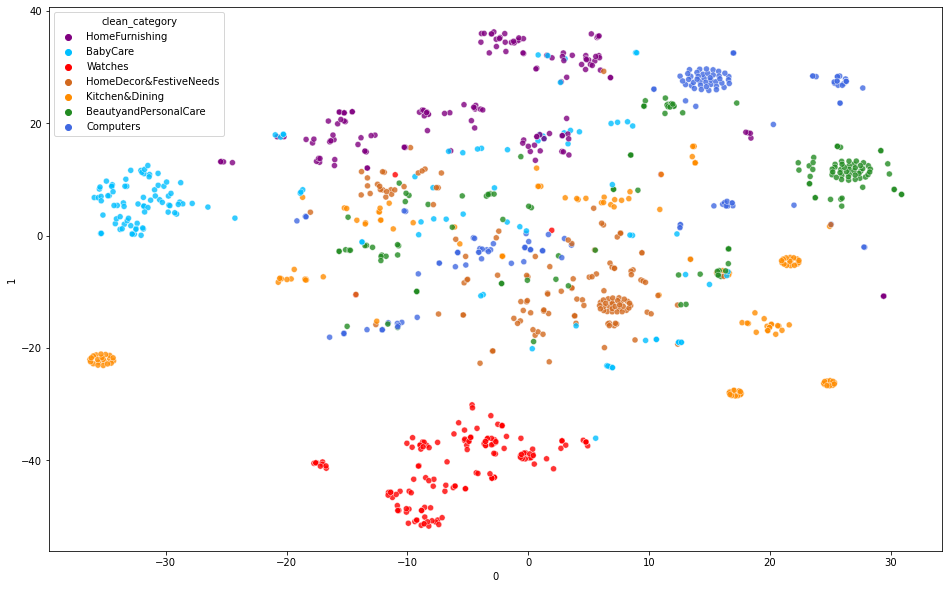

In [33]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results_stem[0], y=tsne_results_stem[1],
    hue=categ,
    palette=color,
    #data=df_subset,
    legend="full",
    alpha=0.8
)

On remarque que malgrès la réduction de dimension les produits sont bien regroupés suivant leur catégories. <br>

On va maintenant réaliser le clustering.

## C - Clustering K-Means <a name=C ></a>
### C.1 - Lemmatized <a name=C.1 ></a>

In [34]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=7, random_state=5)
kmeans.fit(x_lem_reduit)

MiniBatchKMeans(n_clusters=7, random_state=5)

In [35]:
kmeans.labels_

array([5, 5, 5, ..., 1, 1, 1])

On va maintenant colorier les produits suivant leur classe prédit par le K-Means sur le scatterplot du t-SNE :

<AxesSubplot:xlabel='0', ylabel='1'>

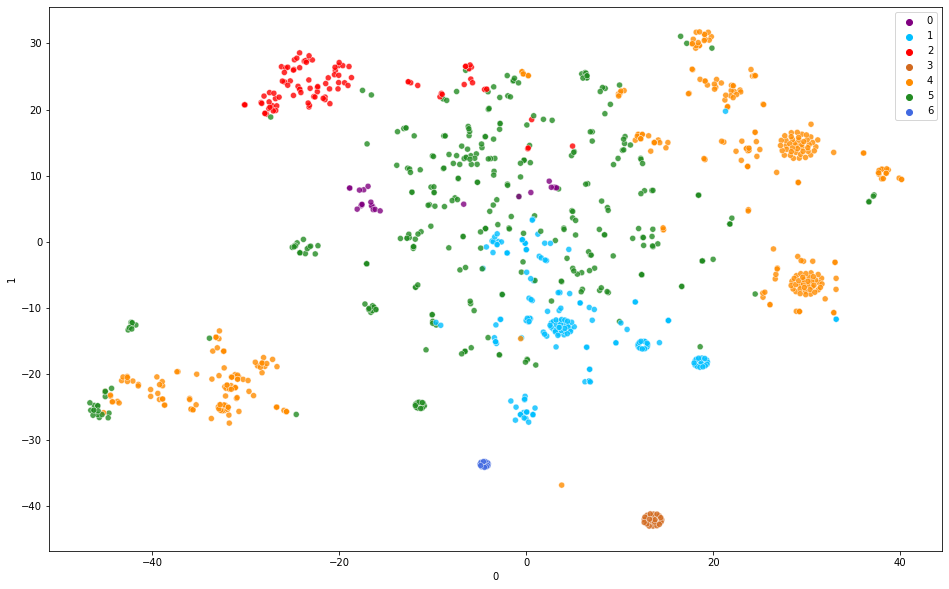

In [36]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results_lem[0], y=tsne_results_lem[1],
    hue=kmeans.labels_,
    palette=color,
    #data=df_subset,
    legend="full",
    alpha=0.8
)

On observe ici qu'un cluster est très dominant et quand on compare les deux visualisations, a part quleques exceptions, on ne retrouves pas les regroupements selon les catégories initiales. 

In [37]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(categ,kmeans.labels_)

0.1310408138711557

### C.2 - Stemmed <a name=C.2 ></a>

In [38]:
kmeans.fit(x_stem_reduit)

MiniBatchKMeans(n_clusters=7, random_state=5)

In [39]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1])

On va maintenant colorier les produits suivant leur classe prédit par le K-Means sur le scatterplot du t-SNE :

<AxesSubplot:xlabel='0', ylabel='1'>

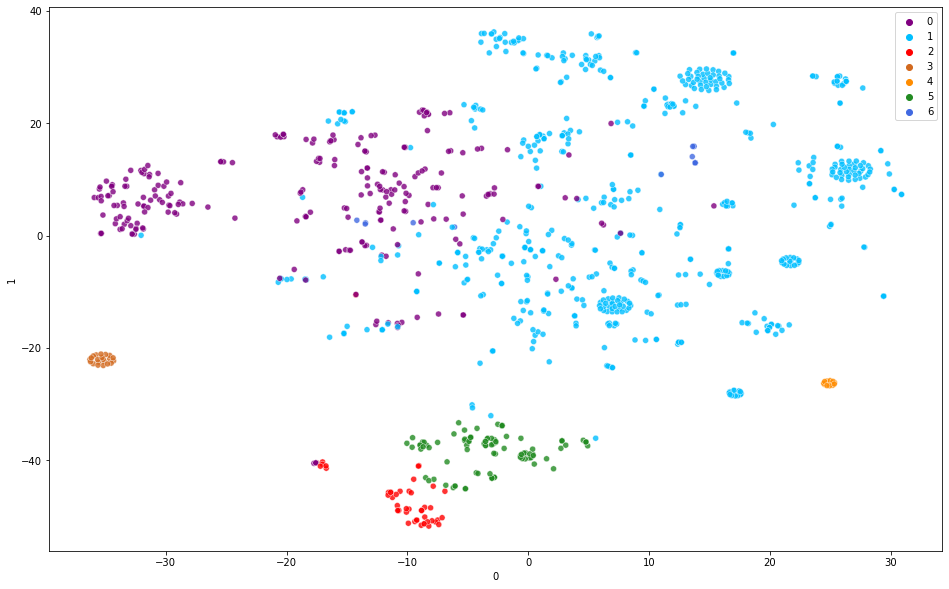

In [40]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results_stem[0], y=tsne_results_stem[1],
    hue=kmeans.labels_,
    palette=color,
    #data=df_subset,
    legend="full",
    alpha=0.8
)

On observe ici qu'un cluster est très dominant et quand on compare les deux visualisations, a part quleques exceptions, on ne retrouves pas les regroupements selon les catégories initiales. 

In [41]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(categ,kmeans.labels_)

0.12075669545847842

Cette observation est confirmée avec la valeur de l'adjusted rand score qui est très proche de 0. <br>

On va donc tester une autre méthode de clustering
## D - Latent Dirichlet Allocation <a name=D ></a>
Cette méthode va nous permettre de regrouper les différentes descriptions par thèmes similaires. <br>
source :
https://medium.com/@yanlinc/how-to-build-a-lda-topic-model-using-from-text-601cdcbfd3a6

In [42]:
txt_features_lem

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
0,0.234519,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
1,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.582051,...,0.0,0.000000,0.0,0.000000,0.071375,0.076126,0.00000,0.198503,0.077785,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.131792,...,0.0,0.050665,0.0,0.000000,0.048483,0.051711,0.06103,0.000000,0.000000,0.0
3,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.182772,0.000000,0.00000,0.000000,0.066396,0.0
4,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.045646,0.0,0.162257,0.131043,0.000000,0.00000,0.000000,0.047604,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
1046,0.000000,0.0,0.0,0.120581,0.0,0.152189,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.108564,0.000000,0.00000,0.000000,0.000000,0.0
1047,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
1048,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0


In [43]:
txt_features_stem

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
0,0.220232,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.071460,0.076485,0.0,0.000000,0.198741,0.077879,0.0
2,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.047946,0.051317,0.0,0.060353,0.000000,0.000000,0.0
3,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.176701,0.000000,0.0,0.000000,0.000000,0.064191,0.0
4,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.158885,0.0,0.128320,0.000000,0.0,0.000000,0.000000,0.046615,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0.000000,0.0,0.0,0.000000,0.0,0.438626,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1046,0.000000,0.0,0.0,0.101176,0.0,0.515051,0.127697,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.091093,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1047,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1048,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0


In [44]:
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 7

# Créer le modèle LDA
lda = LatentDirichletAllocation(
        n_components=n_topics, 
        max_iter=50, 
        learning_method='online', 
        learning_offset=50.,
        #learning_decay = 0.5,
        random_state=0)

# Fitter sur les données
lda_lem=lda.fit(txt_features_lem)
lda_stem=lda.fit(txt_features_stem)

In [45]:
lda_values_lem = lda.fit_transform(txt_features_lem)
lda_values_lem

array([[0.02763755, 0.02755836, 0.02762769, ..., 0.02785814, 0.83410925,
        0.02765248],
       [0.83217728, 0.0279158 , 0.0279343 , ..., 0.02798879, 0.02805843,
        0.02796343],
       [0.85135986, 0.0245651 , 0.02525875, ..., 0.02482289, 0.02486582,
        0.02454611],
       ...,
       [0.03776154, 0.0380256 , 0.03776047, ..., 0.03776979, 0.03778197,
        0.773139  ],
       [0.04348374, 0.04366987, 0.04348295, ..., 0.04353196, 0.04351951,
        0.73882816],
       [0.0378351 , 0.03804259, 0.03783428, ..., 0.03787676, 0.03785954,
        0.77271655]])

In [46]:
lda_values_stem = lda.fit_transform(txt_features_stem)
lda_values_stem

array([[0.83796464, 0.0268507 , 0.02694761, ..., 0.02733766, 0.02690668,
        0.02693963],
       [0.82703634, 0.02794597, 0.02864991, ..., 0.02795021, 0.02795079,
        0.0325091 ],
       [0.85419047, 0.02395262, 0.02446291, ..., 0.02398746, 0.02403768,
        0.02520548],
       ...,
       [0.0377662 , 0.03776283, 0.03777126, ..., 0.03776405, 0.77322159,
        0.03794632],
       [0.04349104, 0.04348644, 0.04349495, ..., 0.04348732, 0.73892445,
        0.04362574],
       [0.03784193, 0.03783713, 0.03784361, ..., 0.03783805, 0.77281773,
        0.03798064]])

In [47]:
#On extrait les numéros de topics
topicnames = ["Topic " + str(i) for i in range(lda.n_components)]
topicnames

['Topic 0', 'Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6']

In [48]:
#On créer un dataframe contenant les valeurs du LDA, topics, pour chaques individus
df_lda_lem = pd.DataFrame(np.round(lda_values_lem, 2), columns=topicnames)
df_lda_lem

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
0,0.03,0.03,0.03,0.03,0.03,0.83,0.03
1,0.83,0.03,0.03,0.03,0.03,0.03,0.03
2,0.85,0.02,0.03,0.02,0.02,0.02,0.02
3,0.63,0.03,0.03,0.03,0.03,0.25,0.03
4,0.39,0.02,0.02,0.02,0.18,0.33,0.02
...,...,...,...,...,...,...,...
1045,0.04,0.04,0.04,0.04,0.04,0.77,0.04
1046,0.03,0.03,0.03,0.03,0.03,0.84,0.03
1047,0.04,0.04,0.04,0.04,0.04,0.04,0.77
1048,0.04,0.04,0.04,0.04,0.04,0.04,0.74


In [49]:
#On créer un dataframe contenant les valeurs du LDA, topics, pour chaques individus
df_lda_stem = pd.DataFrame(np.round(lda_values_stem, 2), columns=topicnames)
df_lda_stem

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
0,0.84,0.03,0.03,0.03,0.03,0.03,0.03
1,0.83,0.03,0.03,0.03,0.03,0.03,0.03
2,0.85,0.02,0.02,0.02,0.02,0.02,0.03
3,0.85,0.02,0.02,0.02,0.02,0.02,0.02
4,0.85,0.02,0.02,0.02,0.02,0.02,0.02
...,...,...,...,...,...,...,...
1045,0.03,0.03,0.03,0.03,0.03,0.80,0.03
1046,0.03,0.03,0.03,0.03,0.03,0.84,0.03
1047,0.04,0.04,0.04,0.04,0.04,0.77,0.04
1048,0.04,0.04,0.04,0.04,0.04,0.74,0.04


In [50]:
#On extrait le sujet dominant pour chaque produits
dominant_topic = np.argmax(df_lda_lem.values, axis=1)
df_lda_lem['dominant_topic'] = dominant_topic
df_lda_lem

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,dominant_topic
0,0.03,0.03,0.03,0.03,0.03,0.83,0.03,5
1,0.83,0.03,0.03,0.03,0.03,0.03,0.03,0
2,0.85,0.02,0.03,0.02,0.02,0.02,0.02,0
3,0.63,0.03,0.03,0.03,0.03,0.25,0.03,0
4,0.39,0.02,0.02,0.02,0.18,0.33,0.02,0
...,...,...,...,...,...,...,...,...
1045,0.04,0.04,0.04,0.04,0.04,0.77,0.04,5
1046,0.03,0.03,0.03,0.03,0.03,0.84,0.03,5
1047,0.04,0.04,0.04,0.04,0.04,0.04,0.77,6
1048,0.04,0.04,0.04,0.04,0.04,0.04,0.74,6


In [51]:
#On extrait le sujet dominant pour chaque produits
dominant_topic = np.argmax(df_lda_stem.values, axis=1)
df_lda_stem['dominant_topic'] = dominant_topic
df_lda_stem

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,dominant_topic
0,0.84,0.03,0.03,0.03,0.03,0.03,0.03,0
1,0.83,0.03,0.03,0.03,0.03,0.03,0.03,0
2,0.85,0.02,0.02,0.02,0.02,0.02,0.03,0
3,0.85,0.02,0.02,0.02,0.02,0.02,0.02,0
4,0.85,0.02,0.02,0.02,0.02,0.02,0.02,0
...,...,...,...,...,...,...,...,...
1045,0.03,0.03,0.03,0.03,0.03,0.80,0.03,5
1046,0.03,0.03,0.03,0.03,0.03,0.84,0.03,5
1047,0.04,0.04,0.04,0.04,0.04,0.77,0.04,5
1048,0.04,0.04,0.04,0.04,0.04,0.74,0.04,5


<AxesSubplot:xlabel='0', ylabel='1'>

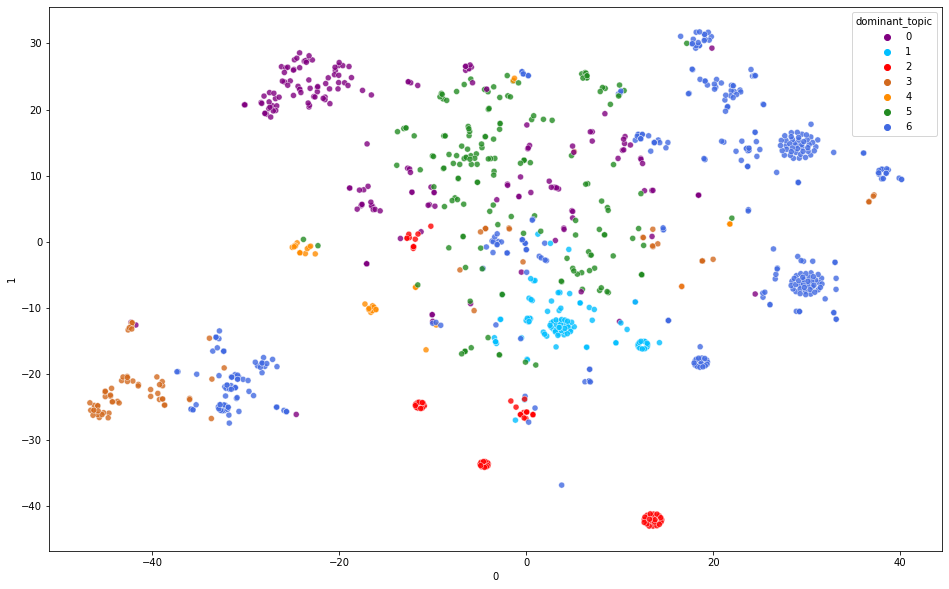

In [52]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results_lem[0], y=tsne_results_lem[1],
    hue=df_lda_lem['dominant_topic'],
    palette=color,
    #data=df_subset,
    legend="full",
    alpha=0.8
)

<AxesSubplot:xlabel='0', ylabel='1'>

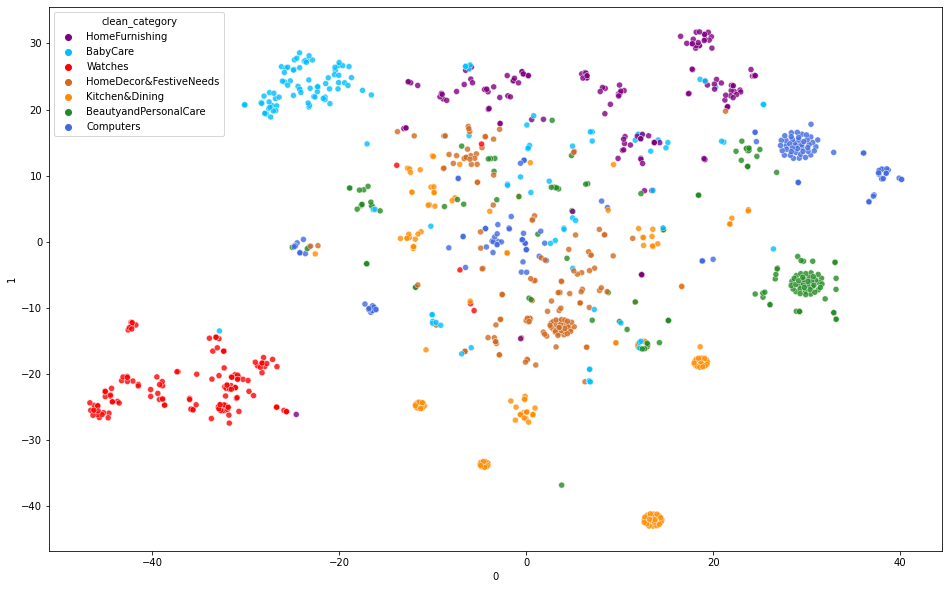

In [53]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results_lem[0], y=tsne_results_lem[1],
    hue=categ,
    palette=color,
    #data=df_subset,
    legend="full",
    alpha=0.8
)

In [54]:
adjusted_rand_score(categ,df_lda_lem['dominant_topic'])

0.17563542416610572

<AxesSubplot:xlabel='0', ylabel='1'>

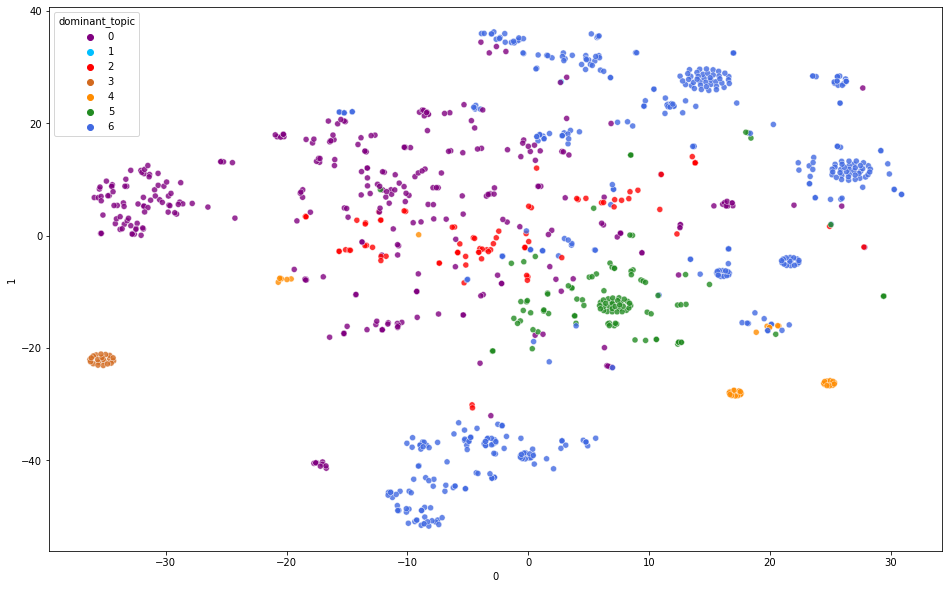

In [55]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results_stem[0], y=tsne_results_stem[1],
    hue=df_lda_stem['dominant_topic'],
    palette=color,
    #data=df_subset,
    legend="full",
    alpha=0.8
)

<AxesSubplot:xlabel='0', ylabel='1'>

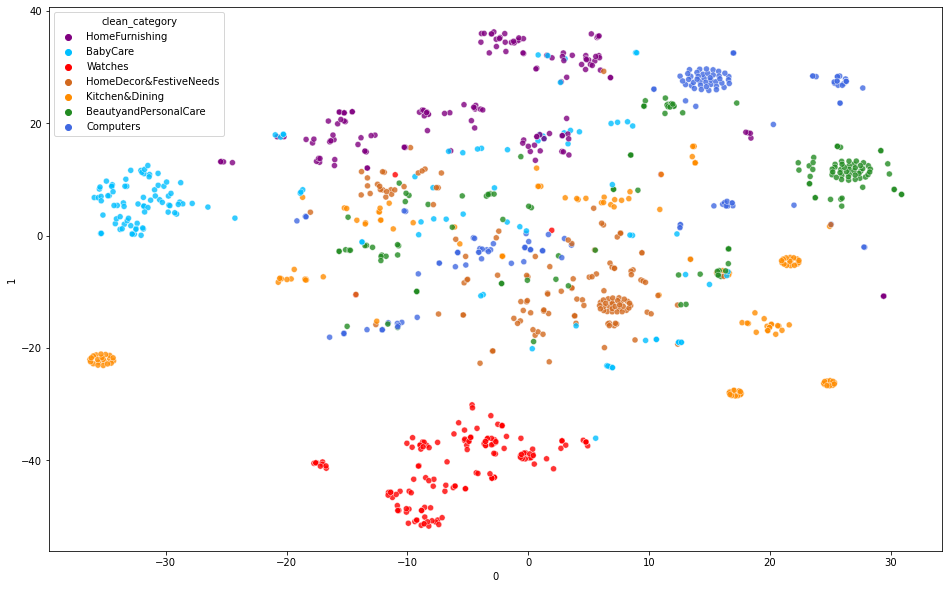

In [56]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results_stem[0], y=tsne_results_stem[1],
    hue=categ,
    palette=color,
    #data=df_subset,
    legend="full",
    alpha=0.8
)

In [57]:
adjusted_rand_score(categ,df_lda_stem['dominant_topic'])

0.12958369304144618

On peut voir que les clusters réalisé par le LDA sont proches des catégories que l'on cherche à obtenir malgrès quelques différences. On passe d'un Adjusted Rand Score de 0.037, avec le k-means, à 0.12 avec le LDA ce qui montre bien que cette deuxième méthode est plus performante. On va maintenant regarder le contenu des topics que le LDA à identifié. 

## E - Interprétation LDA <a name=E ></a>

In [58]:
desc = pd.read_csv("Data/data_txt.csv")
desc_lem = desc['bow_lem']
desc_lem

0       key feature elegance polyester multicolor abst...
1       specification sathiyas cotton bath towel bath ...
2       key feature eurospa cotton terry face towel se...
3       key feature santosh royal fashion cotton print...
4       key feature jaipur print cotton floral king si...
                              ...                        
1045    oren empower extra large self adhesive sticker...
1046    wallmantra large vinyl sticker sticker pack pr...
1047    buy uberlyfe extra large pigmented polyvinyl f...
1048    buy wallmantra medium vinyl sticker sticker r ...
1049    buy uberlyfe large vinyl sticker r online uber...
Name: bow_lem, Length: 1050, dtype: object

In [59]:
desc_stem = desc['bow_stem']
desc_stem

0       key featur eleg polyest multicolor abstract ey...
1       specif sathiya cotton bath towel bath towel re...
2       key featur eurospa cotton terri face towel set...
3       key featur santosh royal fashion cotton print ...
4       key featur jaipur print cotton floral king siz...
                              ...                        
1045    oren empow extra larg self adhes sticker pack ...
1046    wallmantra larg vinyl sticker sticker pack pri...
1047    buy uberlyf extra larg pigment polyvinyl film ...
1048    buy wallmantra medium vinyl sticker sticker rs...
1049    buy uberlyf larg vinyl sticker rs onlin uberly...
Name: bow_stem, Length: 1050, dtype: object

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Extraction des features avec Tf-Idf Vectorizer
tfidf_lem = TfidfVectorizer(min_df=0.01,max_df=0.8)
tfidf_stem = TfidfVectorizer(min_df=0.01,max_df=0.8)

values_lem = tfidf_lem.fit_transform(desc_lem)
values_stem = tfidf_stem.fit_transform(desc_stem)

In [61]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda_lem, tfidf_lem.get_feature_names(), no_top_words)

Topic 0:
age bleach genuine dimension kit fit head box brown ceramic
Topic 1:
aroma dial help durability comfort gentle adorable capacity happy grey
Topic 2:
keep distinctive essential attractive item discount id general kadhai gentle
Topic 3:
graphic dual bedsheet limited express button huge clasp grey collection
Topic 4:
express bedsheet body geometric cotton floral content dual essential coffee
Topic 5:
handle ideal bleach apply gentle find kid get cupcake cash
Topic 6:
brand come beauty contemporary handcrafted ce bath comfortable get cupcake


In [62]:
display_topics(lda_stem, tfidf_stem.get_feature_names(), no_top_words)

Topic 0:
age bleach geometr dishwash king flipkart height box buckl ceram
Topic 1:
area digit high easi combo genuin ador care hard gsm
Topic 2:
keep doubl exclus artist item distinct id gentl kadhai genuin
Topic 3:
green durabl bedsheet light eyelet buy huge clasp gsm coffe
Topic 4:
eyelet bedsheet bodi get contemporari free contain durabl exclus cms
Topic 5:
hang ideal bleach appl genuin fit kid gift curtain casual
Topic 6:
brand combin beauti consumpt handl ce bag come gift curtain


On peut voir ci dessus la liste des topics identifié par le LDA et les 10 mots les plus réprésentatifs pour chaques sujets :
- Topic 0 : 
- Topic 1 : 
- Topic 2 : 

## F - Enregistrement Bag of Words réduits <a name=F ></a>

In [63]:
x_lem_reduit.to_csv("Data/bow_lem_reduit.csv", index = False)
x_stem_reduit.to_csv("Data/bow_stem_reduit.csv", index = False)